In [6]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-small',
         'axes.labelsize': 'x-small',
         'axes.titlesize':'x-small',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
pylab.rcParams.update(params)

#line thickness
#import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 5

import json
import subprocess
from coffea import processor, util, hist
import os, sys

In [2]:
def draw_scores_stacked(h):

    fig, ax = plt.subplots(2,2,sharex=True)
 
    hist.plot1d(h.sum('cc2','bb2','qq2'),overlay='genflavor2',stack=True, ax=ax[0][0])
    ax[0][0].legend(labels=['light','charm','bottom'])
    
    hist.plot1d(h.sum('cc2','bb2','qcd2'),overlay='genflavor2',stack=True, ax=ax[0][1])
    ax[0][1].legend(labels=['light','charm','bottom'])
    
    hist.plot1d(h.sum('qcd2','bb2','qq2'),overlay='genflavor2',stack=True, ax=ax[1][0])
    ax[1][0].legend(labels=['light','charm','bottom'])
    
    hist.plot1d(h.sum('cc2','qcd2','qq2'),overlay='genflavor2',stack=True, ax=ax[1][1])
    ax[1][1].legend(labels=['light','charm','bottom'])

In [3]:
with open('../files/xsec.json') as f:
    xs = json.load(f)
        
with open('../files/pmap.json') as f:
    pmap = json.load(f)

with open('../files/lumi.json') as f:
    lumis = json.load(f)

In [4]:
def read_hist(proc, year):
    indir = "../output/coffea/pnet_scan_msd_QCD_Oct22_2023/"+year+"/"
    infiles = subprocess.getoutput("ls "+indir+year+"_dask_"+proc+".coffea").split()
    outsum = processor.dict_accumulator()

    started = 0
    for filename in infiles:

        print("Loading "+filename)

        if os.path.isfile(filename):
            out = util.load(filename)

            if started == 0:
                outsum['ParticleNet_msd'] = out['ParticleNet_msd']
                outsum['sumw'] = out['sumw']
                started += 1
            else:
                outsum['ParticleNet_msd'].add(out['ParticleNet_msd'])
                outsum['sumw'].add(out['sumw'])

            del out

    scale_lumi = {k: xs[k] * 1000 * lumis[year] / w for k, w in outsum['sumw'].items()} 

    outsum['ParticleNet_msd'].scale(scale_lumi, 'dataset')
    return outsum['ParticleNet_msd'].integrate('region','signal').sum('msd1','bb1').group('dataset', hist.Cat('process', 'Process'), pmap)

Loading ../output/coffea/pnet_scan_msd_QCD_Oct22_2023/2017/2017_dask_HToBB.coffea


/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f4806bfada0>
  warnings.warn(


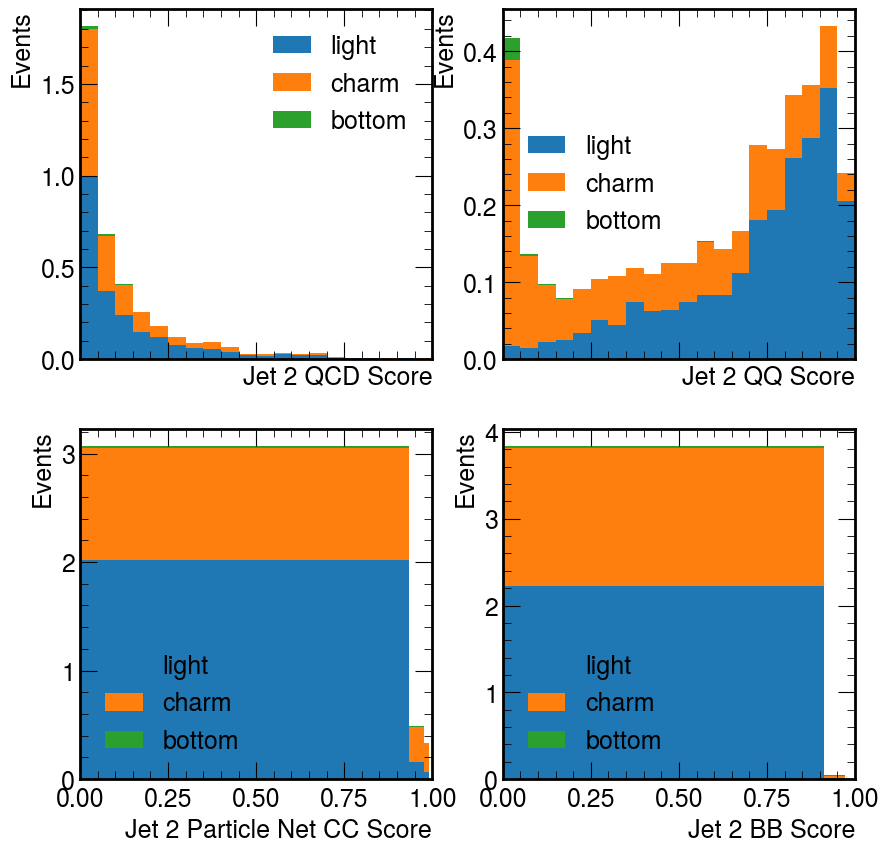

In [7]:
wh = read_hist("HToBB","2017").integrate('process','WH')
draw_scores_stacked(wh)

Loading ../output/coffea/pnet_scan_msd_QCD_Oct22_2023/2017/2017_dask_HToBB.coffea


/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f48052b5900>
  warnings.warn(


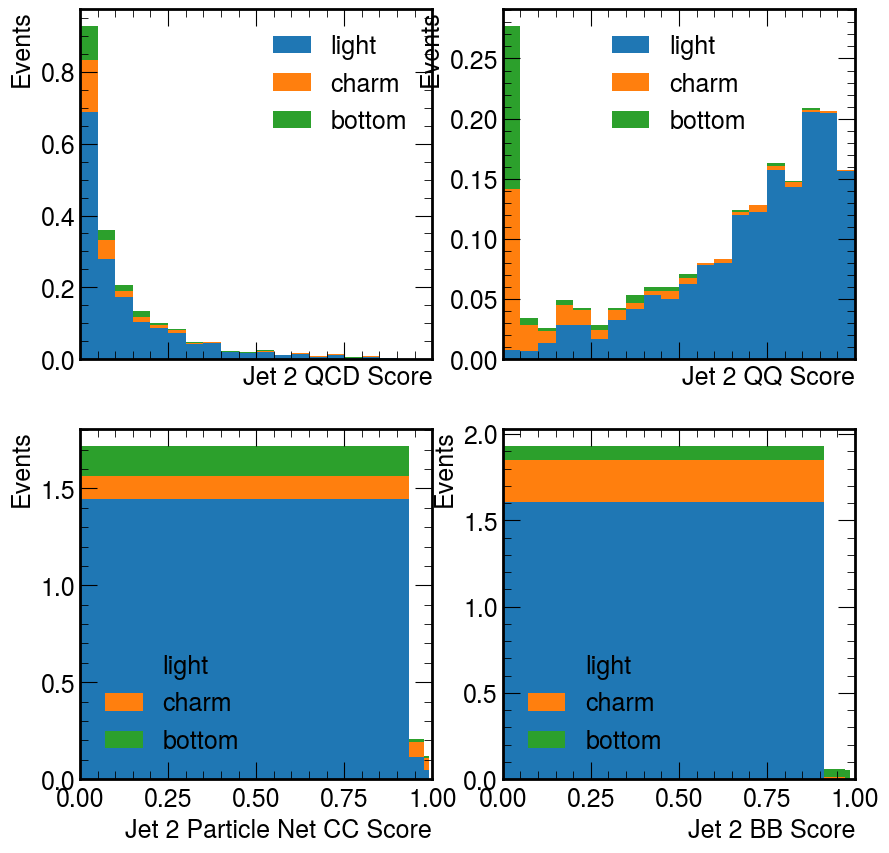

In [8]:
zh = read_hist("HToBB","2017").integrate('process','ZH')
draw_scores_stacked(zh)

Loading ../output/coffea/pnet_scan_msd_QCD_Oct22_2023/2017/2017_dask_Diboson.coffea


/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f4804859c30>
  warnings.warn(


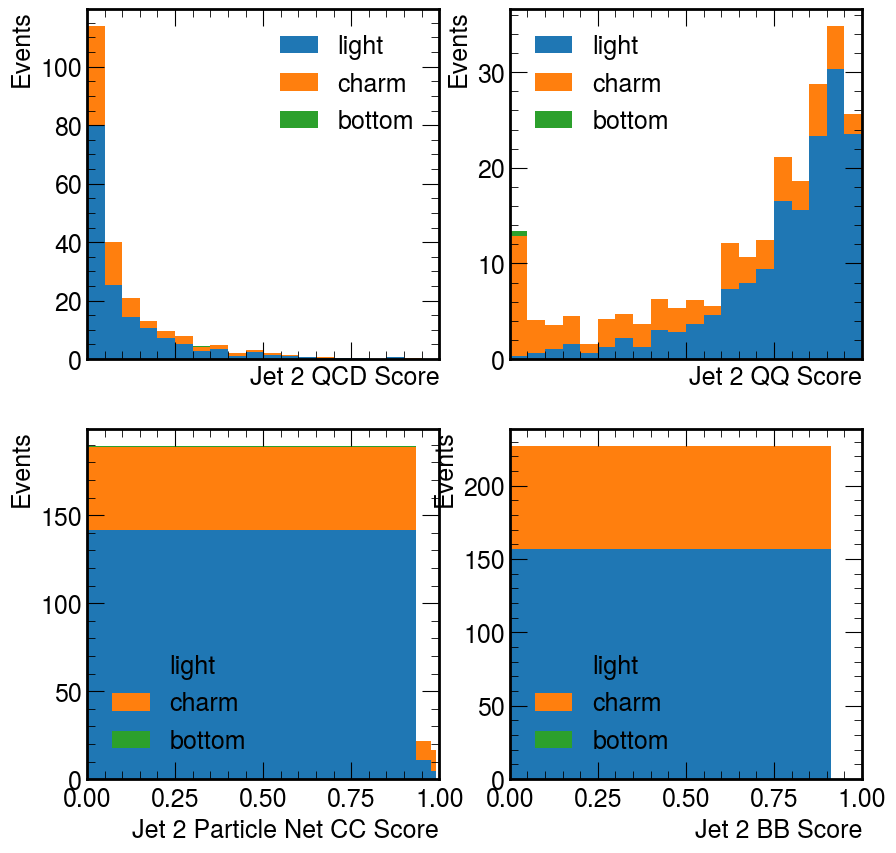

In [12]:
vv = read_hist("Diboson","2017").integrate("process","VV")
draw_scores_stacked(vv)

Loading ../output/coffea/pnet_scan_msd_QCD_Oct22_2023/2017/2017_dask_WJetsToQQ.coffea


/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f480515a260>
  warnings.warn(


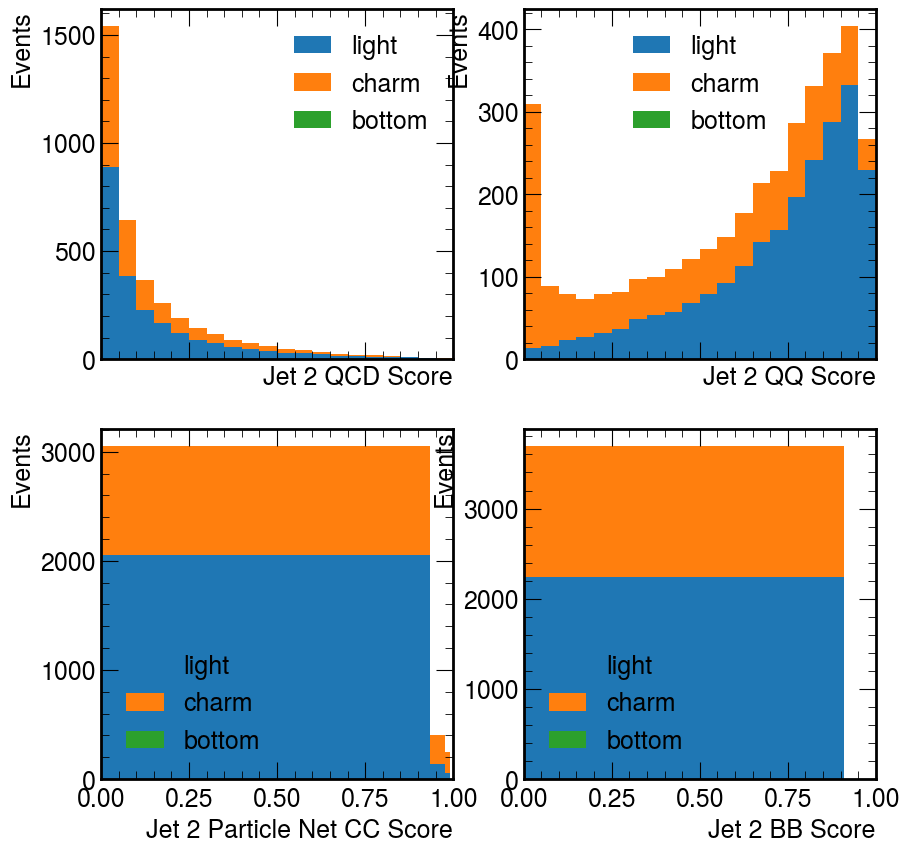

In [17]:
wjets = read_hist("WJetsToQQ","2017").integrate("process","Wjets")
draw_scores_stacked(wjets)

Loading ../output/coffea/pnet_scan_msd_QCD_Oct22_2023/2017/2017_dask_ZJetsToQQ.coffea


/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f48045cbdf0>
  warnings.warn(


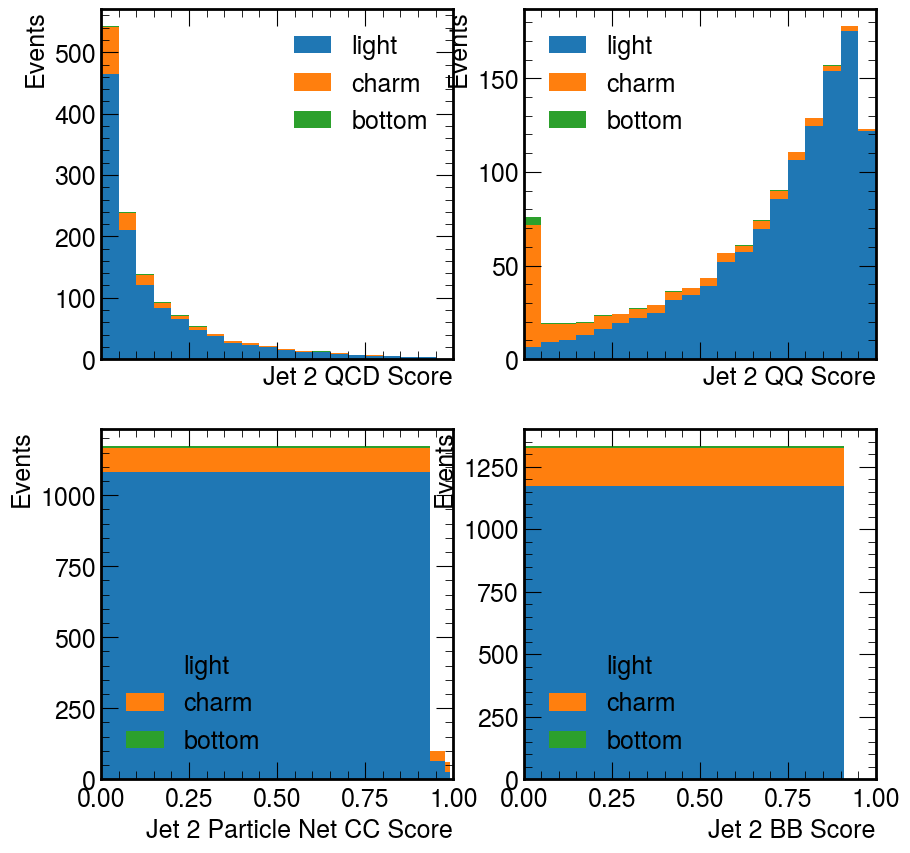

In [18]:
zjets = read_hist("ZJetsToQQ","2017").integrate("process","Zjets")
draw_scores_stacked(zjets)